## Jeffrey Chen APHY 470 PSET 7
## Problem 1

In [20]:
import matplotlib.pyplot as plt
import numpy
import random

### (a)

In [21]:
def percolation_grid(N, p):
    '''
    Creates a NxN grid where each vertex is on with probability p
    Returns the grid
    '''
    grid = [[-1] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            if random.uniform(0, 1) < p:
                grid[i][j] = 1
            else:
                grid[i][j] = 0
    return grid

intersite_vecs = [[0, -1], [0, 1], [-1, 0], [1, 0], [-1, 1], [1, -1], [-1, -1], [1, 1]]

def add_vecs(a, b):
    return [a[0] + b[0], a[1] + b[1]]

def is_sideways_perc(grid):
    # Tries going left to right
    N = len(grid[0])
    visited = [[False] * N for _ in range(N)]
    # Conduct BFS
    queue = []
    for i in range(N):
        if grid[i][0] == 1:
            queue.append([i, 0])
            visited[i][0] = True

    while queue:
        curr_vec = queue.pop(0)
        if curr_vec[1] == N - 1:
            return True
        for v in intersite_vecs:
            next_vec = add_vecs(curr_vec, v)
            # Checks that the next vec is valid and hasn't been visited
            if 0 <= next_vec[0] and next_vec[0] < N and 0 <= next_vec[1] and next_vec[1] < N and not visited[next_vec[0]][next_vec[1]] and grid[next_vec[0]][next_vec[1]] == 1:
                visited[next_vec[0]][next_vec[1]] = True
                queue.append(next_vec)
    return False

def is_vertical_perc(grid):
    # Tries going top to bottom
    N = len(grid[0])
    visited = [[False] * N for _ in range(N)]
    # Conduct BFS
    queue = []
    for j in range(N):
        if grid[0][j] == 1:
            queue.append([0, j])
            visited[0][j] = True

    while queue:
        curr_vec = queue.pop(0)
        if curr_vec[0] == N - 1:
            return True
        for v in intersite_vecs:
            next_vec = add_vecs(curr_vec, v)
            # Checks that the next vec is valid and hasn't been visited
            if 0 <= next_vec[0] and next_vec[0] < N and 0 <= next_vec[1] and next_vec[1] < N and not visited[next_vec[0]][next_vec[1]] and grid[next_vec[0]][next_vec[1]] == 1:
                visited[next_vec[0]][next_vec[1]] = True
                queue.append(next_vec)
    return False

p        Percolation probability
0.00     0.0                     
0.10     0.0                     
0.20     0.0                     
0.30     0.0                     
0.35     0.15                    
0.36     0.25                    
0.37     0.35                    
0.38     0.39                    
0.39     0.38                    
0.40     0.5                     
0.41     0.71                    
0.42     0.79                    
0.43     0.81                    
0.44     0.9                     
0.45     0.93                    
0.50     0.99                    
0.60     1.0                     
0.70     1.0                     
0.80     1.0                     
0.90     1.0                     
1.00     1.0                     


Text(0.5, 1.0, 'Percolation probability vs p')

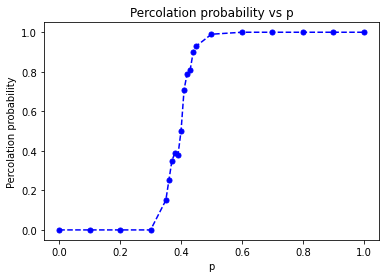

In [36]:
num_samples = 100
probs = numpy.append(numpy.append(numpy.linspace(0, .3, 4), numpy.linspace(.35, .45, 11)), numpy.linspace(.5, 1, 6))
N = 25

prob_percs = []
print("{:<8} {:<8}".format("p", "Percolation probability"))
for p in probs:
    perc_success = 0
    for iter in range(num_samples):
        grid = percolation_grid(N, p)
        if is_sideways_perc(grid) or is_vertical_perc(grid):
            perc_success += 1
    prob_perc = perc_success / num_samples
    prob_percs.append(prob_perc)
    print("{:<8.2f} {:<24}".format(p, prob_perc))

plt.plot(probs, prob_percs, ls = "--", color = "blue", marker = ".", ms = 10)
plt.xlabel("p")
plt.ylabel("Percolation probability")
plt.title("Percolation probability vs p")


It can be seen by running my percolation simulation for multiple different values of $p$ that the point at which the probability of percolation sharply increases is $p_c = 0.40$

### (b)
The square lattice is dual to itself in that if we create bonds between the centers of the original square lattice, we end up creating another square lattice. The percolation threshold is the point after which percolation occurs with very high probability, leading percolation in the dual to likely not occur. Let the percolation capacity of the original square lattice be $p_c(G)$ and the percolation capacity of the dual lattice be $p_c(G)$. We have something like $p_c(G) \approx 1 - p_c(G')$. Since the original lattice and dual lattice have the same structure, we have that $p_c(G) = p_c(G')$. Putting this together, we obtain $p_c(G) = \frac{1}{2}$ as desired.

### (c)
Let $p_c(H)$ be the percolation threshold of our hexagonal lattice and $p_c(T)$ be the percolation threshold of our triangular lattice. We can notice by observation that the triangular lattice is more "efficient" at percolation and is able to go between opposite sides in about half as many bonds as would be required by our hexagonal lattice. Thus, the triangular lattice should require a probability roughly half as high as that of the hexagonal lattice to have a high probability of percolation. Thus, $p_c(T) \approx \frac{1}{2} p_c(H)$.